In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
train_path = '../../../Pictures/Cats_and_Dogs/train'
valid_path = '../../../Pictures/Cats_and_Dogs/valid'
test_path = '../../../Pictures/Cats_and_Dogs/test'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['Dog', 'Cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['Dog', 'Cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['Dog', 'Cat'], batch_size=30)

Found 126 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [5]:
# Plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
imgs, labels = next(train_batches)

/home/pcsanchez/cv/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


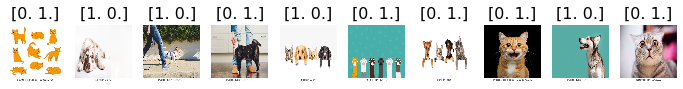

In [7]:
plots(imgs, titles=labels)

# Build and Train CNN

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [9]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit_generator(train_batches, steps_per_epoch=13, validation_data=valid_batches, validation_steps=13, epochs=5, verbose=2)

Epoch 1/5
 - 2s - loss: 2896.7433 - accuracy: 0.4444 - val_loss: 711.3240 - val_accuracy: 0.5098
Epoch 2/5
 - 2s - loss: 395.9143 - accuracy: 0.5159 - val_loss: 149.4265 - val_accuracy: 0.5098
Epoch 3/5
 - 2s - loss: 138.7483 - accuracy: 0.6508 - val_loss: 732.1216 - val_accuracy: 0.4902
Epoch 4/5
 - 2s - loss: 445.1554 - accuracy: 0.6190 - val_loss: 2305.5808 - val_accuracy: 0.4902
Epoch 5/5
 - 2s - loss: 329.8762 - accuracy: 0.6825 - val_loss: 12.3954 - val_accuracy: 0.4314


# Predict

/home/pcsanchez/cv/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


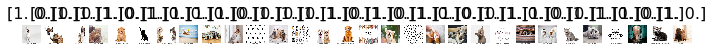

In [11]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [12]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.], dtype=float32)

In [13]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [14]:
predictions

array([[1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.6006990e-14],
       [1.0000000e+00, 4.5451719e-36],
       [1.0000000e+00, 0.0000000e+00],
       [1.9742900e-10, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [2.9650298e-38, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.

In [15]:
cm = confusion_matrix(test_labels, round(predictions[:,0])

SyntaxError: unexpected EOF while parsing (<ipython-input-15-3fe00facbee3>, line 1)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astpye('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Build Fine-tuned VGG16 model

In [53]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 23s 0us/step


In [60]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [61]:
type(vgg16_model)

keras.engine.training.Model

In [63]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [65]:
for layer in model.layers:
    layer.trainable = False

In [66]:
model.add(Dense(2, activation='softmax'))

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train the fine-tuned VGG16 model

In [68]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit_generator(train_batches, steps_per_epoch=13, validation_data=valid_batches, validation_steps=13, epochs=5, verbose=2)

Epoch 1/5
 - 24s - loss: 1.2834 - accuracy: 0.5079 - val_loss: 2.4337 - val_accuracy: 0.5098
Epoch 2/5
 - 24s - loss: 0.9157 - accuracy: 0.5476 - val_loss: 4.5116 - val_accuracy: 0.5098
Epoch 3/5
 - 24s - loss: 0.7048 - accuracy: 0.6349 - val_loss: 0.6878 - val_accuracy: 0.5490
Epoch 4/5
 - 24s - loss: 0.6072 - accuracy: 0.6905 - val_loss: 2.5314 - val_accuracy: 0.5294
Epoch 5/5
 - 25s - loss: 0.5030 - accuracy: 0.7460 - val_loss: 0.4093 - val_accuracy: 0.5490


# Predict using fine-tuned VGG16 model

In [73]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [74]:
predictions = model.predict_generator(test_batches, steps=1,verbose=0)

In [75]:
predictions

array([[0.09779284, 0.90220714],
       [0.08244236, 0.9175576 ],
       [0.96064854, 0.0393514 ],
       [0.11337458, 0.88662547],
       [0.99651355, 0.00348642],
       [0.0716878 , 0.92831224],
       [0.815993  , 0.18400696],
       [0.24984413, 0.7501559 ],
       [0.63143533, 0.36856467],
       [0.08578361, 0.91421634],
       [0.95817965, 0.04182038],
       [0.38832515, 0.61167485],
       [0.5902144 , 0.4097856 ],
       [0.13739225, 0.8626077 ],
       [0.28365642, 0.7163436 ],
       [0.5821931 , 0.41780692],
       [0.7800746 , 0.21992539],
       [0.1008144 , 0.89918566],
       [0.95013094, 0.04986909],
       [0.05270503, 0.947295  ],
       [0.00167891, 0.9983211 ],
       [0.72768146, 0.2723185 ],
       [0.00484467, 0.99515533],
       [0.22481881, 0.77518123],
       [0.04397667, 0.9560234 ],
       [0.07288439, 0.9271156 ],
       [0.37530598, 0.624694  ],
       [0.0267721 , 0.973228  ],
       [0.00792007, 0.9920799 ],
       [0.0028607 , 0.99713933]], dtype=flo

In [76]:
cm = confusion_matrix(test_labels,np.round(predictions[:,0]))

Confusion matrix, without normalization
[[11  4]
 [ 9  6]]


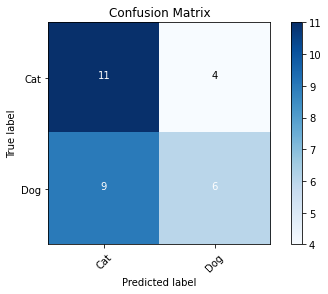

In [79]:
cm_plot_labels = ['Cat', 'Dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')